<a href="https://colab.research.google.com/github/AroopGit/Deep_Learning_Projects/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip list

In [11]:


import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
import os

[]


In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [12]:
tf.config.list_physical_devices('GPU')


[]

In [13]:
import cv2
import imghdr

# Setup Done

In [14]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [15]:
data_dir='data'

In [16]:
os.listdir('data')

['Sad', 'Happy']

In [18]:
for image_class in os.listdir(data_dir):
  print(image_class)

Sad
Happy


In [17]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/Sad/vector7.svg
Image not in ext list data/Sad/depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext list data/Sad/portrait-sad-man-600nw-126009806.jpg
Image not in ext list data/Sad/vector4.svg
Image not in ext list data/Sad/sad-person-pictures-1600-x-800-n77vd5qyas66fpkx.jpg
Image not in ext list data/Sad/vector5.svg
Image not in ext list data/Sad/vector6.svg
Image not in ext list data/Sad/Sad-man-sitting-in-bedroom-thumbnail-732x549.jpg
Image not in ext list data/Sad/vector9.svg
Image not in ext list data/Sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list data/Sad/vector8.svg
Image not in ext list data/Sad/vector2.svg
Image not in ext list data/Sad/depositphotos_217564870-stock-photo-young-attractive-sad-black-african.jpg
Image not in ext list data/Sad/portrait-man-sad-mood-people-260nw-1024988086.jpg
Image not in ext list data/Sad/depositphotos_83965442-stock-photo-woman-silhouette-wa

In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 244 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [22]:
batch = data_iterator.next()

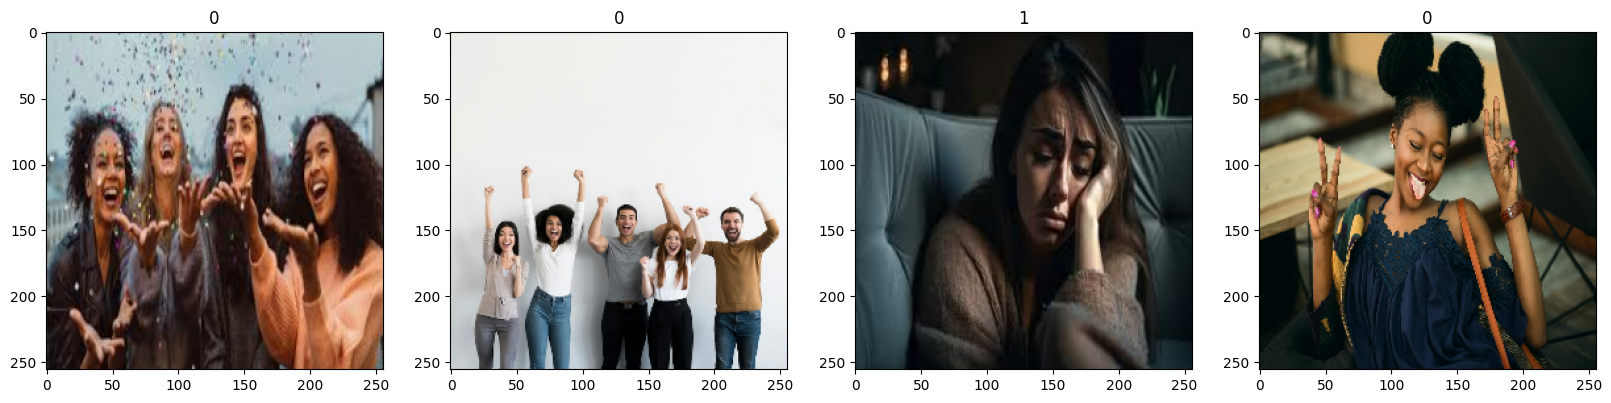

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [24]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [27]:
train_size

5

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [29]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [31]:
model = Sequential()


model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
model.summary(
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [36]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
5/5 [==============================] - 18s 3s/step - loss: 1.2068 - accuracy: 0.4812 - val_loss: 0.8833 - val_accuracy: 0.4062
Epoch 2/20
5/5 [==============================] - 18s 4s/step - loss: 0.6644 - accuracy: 0.6187 - val_loss: 0.6519 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 13s 2s/step - loss: 0.5831 - accuracy: 0.6812 - val_loss: 0.4906 - val_accuracy: 0.8438
Epoch 4/20
5/5 [==============================] - 13s 2s/step - loss: 0.4863 - accuracy: 0.7812 - val_loss: 0.5288 - val_accuracy: 0.8438
Epoch 5/20
5/5 [==============================] - 13s 2s/step - loss: 0.3732 - accuracy: 0.8562 - val_loss: 0.3803 - val_accuracy: 0.8125
Epoch 6/20
5/5 [==============================] - 13s 2s/step - loss: 0.3393 - accuracy: 0.8438 - val_loss: 0.3888 - val_accuracy: 0.7500
Epoch 7/20
5/5 [==============================] - 17s 3s/step - loss: 0.2549 - accuracy: 0.9438 - val_loss: 0.1720 - val_accuracy: 0.9375
Epoch 8/20
5/5 [==================

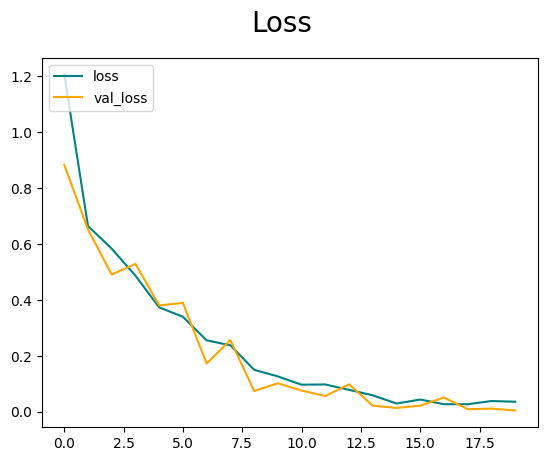

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

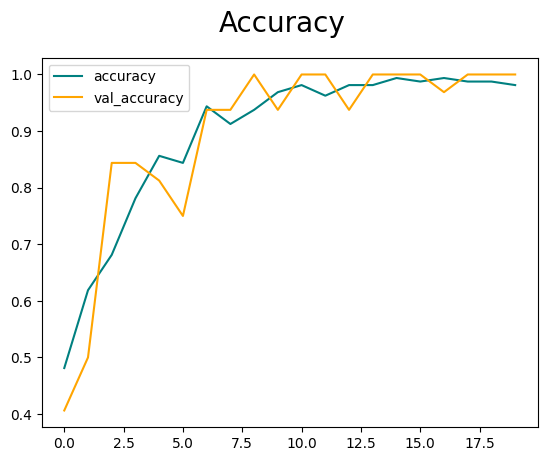

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


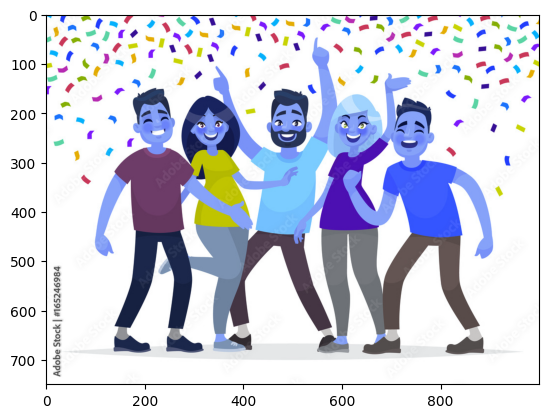

In [41]:
import cv2
img = cv2.imread('/content/data/Happy/1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg')
plt.imshow(img)
plt.show()

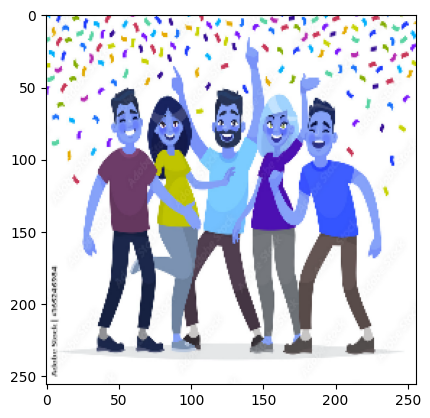

In [42]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

1/1 [==============================] - 0s 56ms/step
Predicted class is Happy


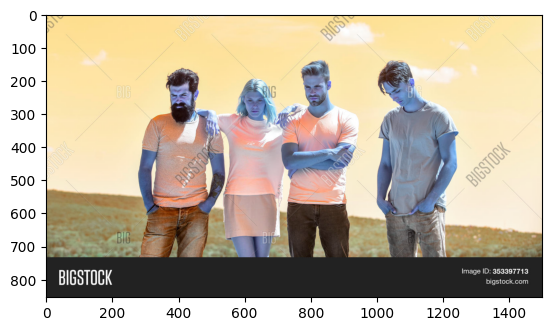

In [46]:
img2 = cv2.imread('/content/data/Sad/353397713.jpg')
plt.imshow(img2)
plt.show()

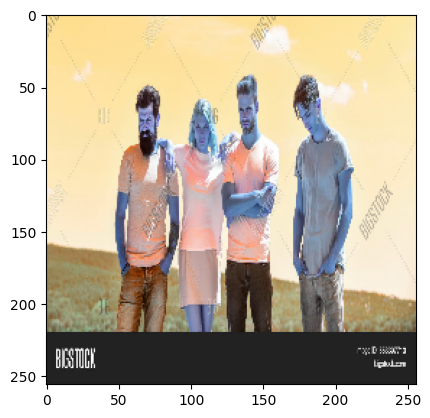

In [49]:
resize = tf.image.resize(img2, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:

import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')


1/1 [==============================] - 0s 54ms/step
Predicted class is Sad


# Code Done, Model works, Loading it..

In [53]:


model.save('happy_sad_model.h5')

model = tf.keras.models.load_model('happy_sad_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
